In [38]:
import numpy as np
from matplotlib import pyplot as plt

import scienceplots

plt.style.use(['science', 'notebook'])


In [ ]:

def bogacki_shampine_step(T_curr, P_curr, h_liq_curr, h_gas_curr, v_liq_curr, v_gas_curr, dT):
    """
    Вычисляет следующее значение давления по точному методу Богацки-Шампина
    (3-й порядок с оценкой ошибки 2-го порядка).
    
    Параметры:
    ----------
    T_curr : float          - Текущая температура
    P_curr : float          - Текущее давление
    h_liq_curr, h_gas_curr : float - Энтальпии жидкости/газа
    v_liq_curr, v_gas_curr : float - Удельные объёмы жидкости/газа
    dT : float              - Шаг по температуре
    
    Возвращает:
    -----------
    P_next : float          - Давление на следующем шаге (3-й порядок)
    P_embedded : float      - Оценка давления (2-й порядок, для контроля ошибки)
    error : float           - Разница между оценками
    """
    # Правая часть уравнения Клапейрона-Клаузиуса
    def rhs(T, P):
        delta_h = h_gas_curr - h_liq_curr  # Предполагаем, что h и v не зависят от P на малом шаге
        delta_v = v_gas_curr - v_liq_curr
        return delta_h / (T * delta_v)
    
    # Стадии метода (коэффициенты из таблицы Бутчера)
    k1 = rhs(T_curr, P_curr)
    k2 = rhs(T_curr + 0.5*dT, P_curr + 0.5*dT*k1)
    k3 = rhs(T_curr + 0.75*dT, P_curr + 0.75*dT*k2)
    
    # Основная формула 3-го порядка
    P_next = P_curr + dT * ( (2/9)*k1 + (1/3)*k2 + (4/9)*k3 )
    
    # Вложенная формула 2-го порядка для контроля ошибки
    P_embedded = P_curr + dT * ( (7/24)*k1 + (1/4)*k2 + (1/3)*k3 + (1/8)*k3 )  # k3 повторно используется вместо k4
    
    error = np.abs(P_next - P_embedded)
    
    return P_next, P_embedded, error

$$\dfrac{dP}{dT} = \dfrac{\Delta s}{\Delta v} = \dfrac{\Delta h}{T \Delta v}$$

In [32]:
P_liq = [-0.0051, ]
P_gas_3 = [0.00450, 0.00680399, 0.00986731, 0.01378808, 0.01890551, 0.02458504, 0.03149982, 0.03974023]
P_gas_2 = [0.00450, 0.00680851, 0.00987406, 0.01379719, 0.01892923, 0.02462360, 0.03155871, 0.03987360]
errs = [0.00000452, 0.00000565, 0.00000683, 0.00000893, 0.00000849, 0.00001034, 0.00001240]
T_arr = [0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15]

h_liq_3 = [-4.504223, -4.23176214803271, -3.95559615287398, -3.67089413527237, -3.37016310210409, -3.05054053835944, -2.71537068578347]
h_gas_3 = [1.8982238, 1.97879853664237, 2.05769251363551, 2.13144660290057, 2.1835786677965, 2.23931719047516, 2.29217368692379]
v_liq_3 = [1.2514409, 1.28840688214699, 1.32855132853442, 1.37418838942326, 1.42735582262742, 1.49138654459571, 1.56799491964173]
v_gas_3 = [169.71892, 117.171730461425, 84.2518076121555, 62.6778772212322, 46.9171953974966, 37.0796077437677, 29.8374111701088]

h_liq_2 = [-4.504223,  -4.23197910860615, -3.95548129015097, -3.66590933475862, -3.36309857549855, -3.05457087748332, -2.72772906567669]
h_gas_2 = [1.8982238,  1.98547593545465, 2.06404517299849, 2.13235484398323, 2.18285034904247, 2.23858183872056, 2.28662559975557]
v_liq_2 = [1.2514409,  1.28819055790539, 1.32866094067874, 1.37520499838333,  1.42887544412396, 1.49023017532058, 1.56524496888764]
v_gas_2 = [169.718922, 117.429745641312, 84.4325778776561, 62.5679275429915,  46.8041446665618, 37.0492769760788, 29.6614348610109]
 
# P_next_3rd, _, error = bogacki_shampine_step(T_arr[-1], P_gas_3[-1], h_liq_3[-1], h_gas_3[-1], v_liq_3[-1], v_gas_3[-1], dT=0.05)
# _, P_next_2nd, error = bogacki_shampine_step(T_arr[-1], P_gas_2[-1], h_liq_2[-1], h_gas_2[-1], v_liq_2[-1], v_gas_2[-1], dT=0.05)
# print(f's=3: P = {P_next_3rd:.8f}\ns=2: P = {P_next_2nd:.8f}\nerr = {error:.8f}')



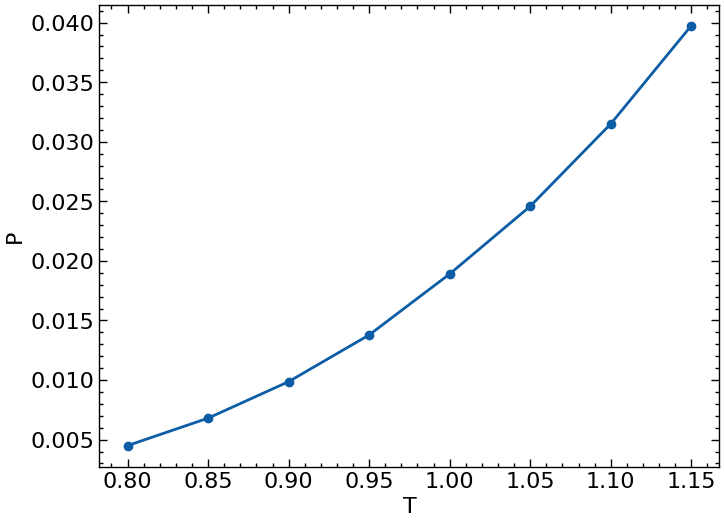

In [50]:
plt.errorbar(T_arr, P_gas_3, marker='o', yerr=np.hstack([0, errs]))
plt.xlabel('T')
plt.ylabel('P')
plt.savefig('./images/phase_eq.png')

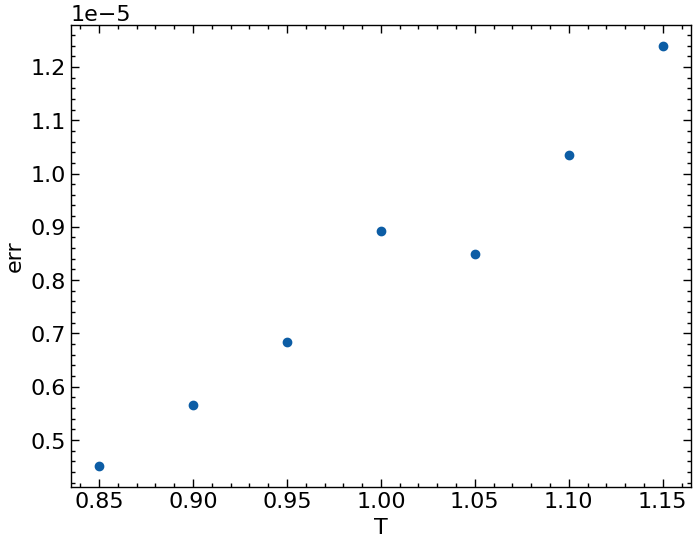

In [52]:
plt.scatter(T_arr[1:], errs)
plt.xlabel('T')
plt.ylabel('err')
plt.savefig('./images/errs.png')